### This script generates a bar plot visualizing molecular properties, using molecule images from SMILES strings as x-axis labels

In [1]:
import io
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def plot_molvbar(data_dict,figname=None):

    # Adjust linewidth globally
    mpl.rcParams['axes.linewidth'] = 0.001  # Set to a very small value

    # Extract SMILES strings and properties
    smiles_list = list(data_dict.keys())
    properties =  list(data_dict.values())

    # Function to generate molecular images
    def generate_mol_image(smiles):
        mol = Chem.MolFromSmiles(smiles)
        return Draw.MolToImage(mol,size=(300, 200))

    # Convert images to a displayable format (e.g., temporary PNG files)
    def image_to_buffer(image):
        buffer = io.BytesIO()
        image.save(buffer, format='PNG') 
        return buffer.getvalue()

    # Generate image data
    mol_images = [generate_mol_image(smiles) for smiles in smiles_list]
    image_buffers = [image_to_buffer(img) for img in mol_images]

    # Clear previous x-axis settings
    plt.clf() 

    # Create the bar plot

    color_list = [(0.05,0.35,0.75),(0.05,0.8,0.6),(0.9,0.3,0.05),(0.35,0.7,0.9),(0.9,0.5,0.7),(0.9,0.6,0.05),(0.95,0.9,0.25),(0.05,0.05,0.05)]*10   # Supposedly more CB-friendly

    plt.figure(figsize=(9, 6))  # Adjust figure size as needed

    # Add molecule images as x-axis labels
    for i, buffer in enumerate(image_buffers):
        img = plt.imread(io.BytesIO(buffer))  # Read image from buffer
        offset = min(properties) - 0.75  # Offset for placing below the bar
        plt.imshow(img, aspect='auto', extent=(i-0.25, i+0.25, offset, offset+0.5))

    for count_i, i in enumerate(properties):
        plt.bar(count_i,i,color=color_list[count_i],alpha=0.5,width=0.169,align='center')
        plt.scatter(count_i,i,color=color_list[count_i],marker='o',alpha=0.75, s=450)

    # Borders
    plt.axhline(y=0, color='black', linestyle='-',linewidth=2.5) 
    plt.axhline(y=max(properties)+0.5, color='black', linestyle='-',linewidth=2.5)
    plt.vlines([-0.5,len(smiles_list)-0.5], ymin=0, ymax=max(properties)+0.5, colors='black',linewidth=2.5)
    plt.xlim(-0.51, len(smiles_list)-0.49) 
    plt.xticks([])
    plt.yticks(range(int(min(properties)),int(max(properties)+2)))

    # Labels and Title
    plt.xlabel("Molecules")
    plt.ylabel("Molecular Property")
    plt.title("Molecular Property")
    plt.tight_layout() 

    plt.show()
    
    if figname is not None:
        plt.savefig(figname)
        
    return

<Figure size 432x288 with 0 Axes>

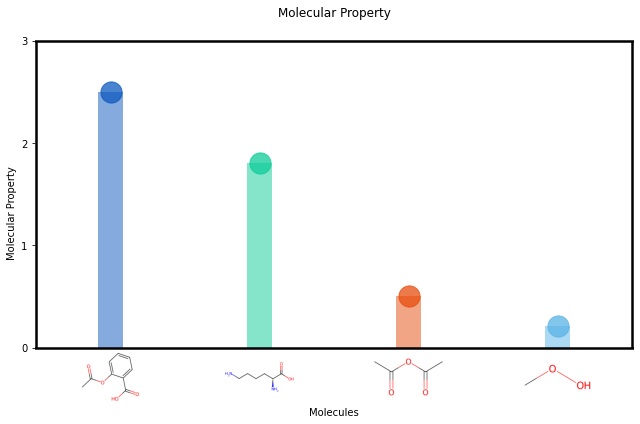

In [3]:
# Sample data (replace with your actual dictionary)
smiles_dict = {
    'O=C(C)Oc1ccccc1C(=O)O': 2.5,  # Aspirin
    'NCCCC[C@H](N)C(=O)O': 1.8,    # Asparagine
    'CC(=O)OC(=O)C': 0.5,          # Oxalic acid
    'COO': 0.21
}

plot_molvbar(smiles_dict)